In [106]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

##### 1a) Print the stastical description of the predictor variables in the data and plot standard staticstical description for each of the predictor variable. The predictors variance, Skewdness, Kurtosis, entropy are all numeric

In [107]:
# Extracting the data as per stated in the question

quiz_data = pd.read_csv('quizData(1).csv')
quiz_data.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.8073,-0.44699,Genuine
1,4.54590,8.1674,-2.4586,-1.46210,Genuine
2,3.86600,-2.6383,1.9242,0.10645,Genuine
3,3.45660,9.5228,-4.0112,-3.59440,Genuine
4,0.32924,-4.4552,4.5718,-0.98880,Genuine


In [108]:
quiz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1000 non-null   float64
 1   Skewness  1000 non-null   float64
 2   Kurtosis  1000 non-null   float64
 3   Entropy   1000 non-null   float64
 4   Banknote  1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


###### For variance, skewness, kurosis, entropy are numeric, but for banknote it is in object for we need to convert it to categorical

In [109]:
quiz_data['Banknote'] = quiz_data['Banknote'].astype('category')
quiz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Variance  1000 non-null   float64 
 1   Skewness  1000 non-null   float64 
 2   Kurtosis  1000 non-null   float64 
 3   Entropy   1000 non-null   float64 
 4   Banknote  1000 non-null   category
dtypes: category(1), float64(4)
memory usage: 32.4 KB


In [110]:
# Extract only the numeric data variables
##For continous data
numeric_data = pd.DataFrame(quiz_data[['Variance','Skewness','Kurtosis','Entropy','Banknote']])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,Variance,Skewness,Kurtosis,Entropy
count,1000.00,1000.00,1000.00,1000.00
mean,0.17,1.72,1.45,-1.22
std,2.82,5.94,4.46,2.11
min,-7.04,-13.77,-5.26,-8.55
25%,-1.94,-1.92,-1.67,-2.53
50%,0.12,2.14,0.56,-0.62
75%,2.46,6.57,3.44,0.38
max,6.56,12.95,17.93,2.45


###### Plotting of the graphs, We can use the normal distribution (boxplot && voilin plot) and swarmplot for the 'Banknote'

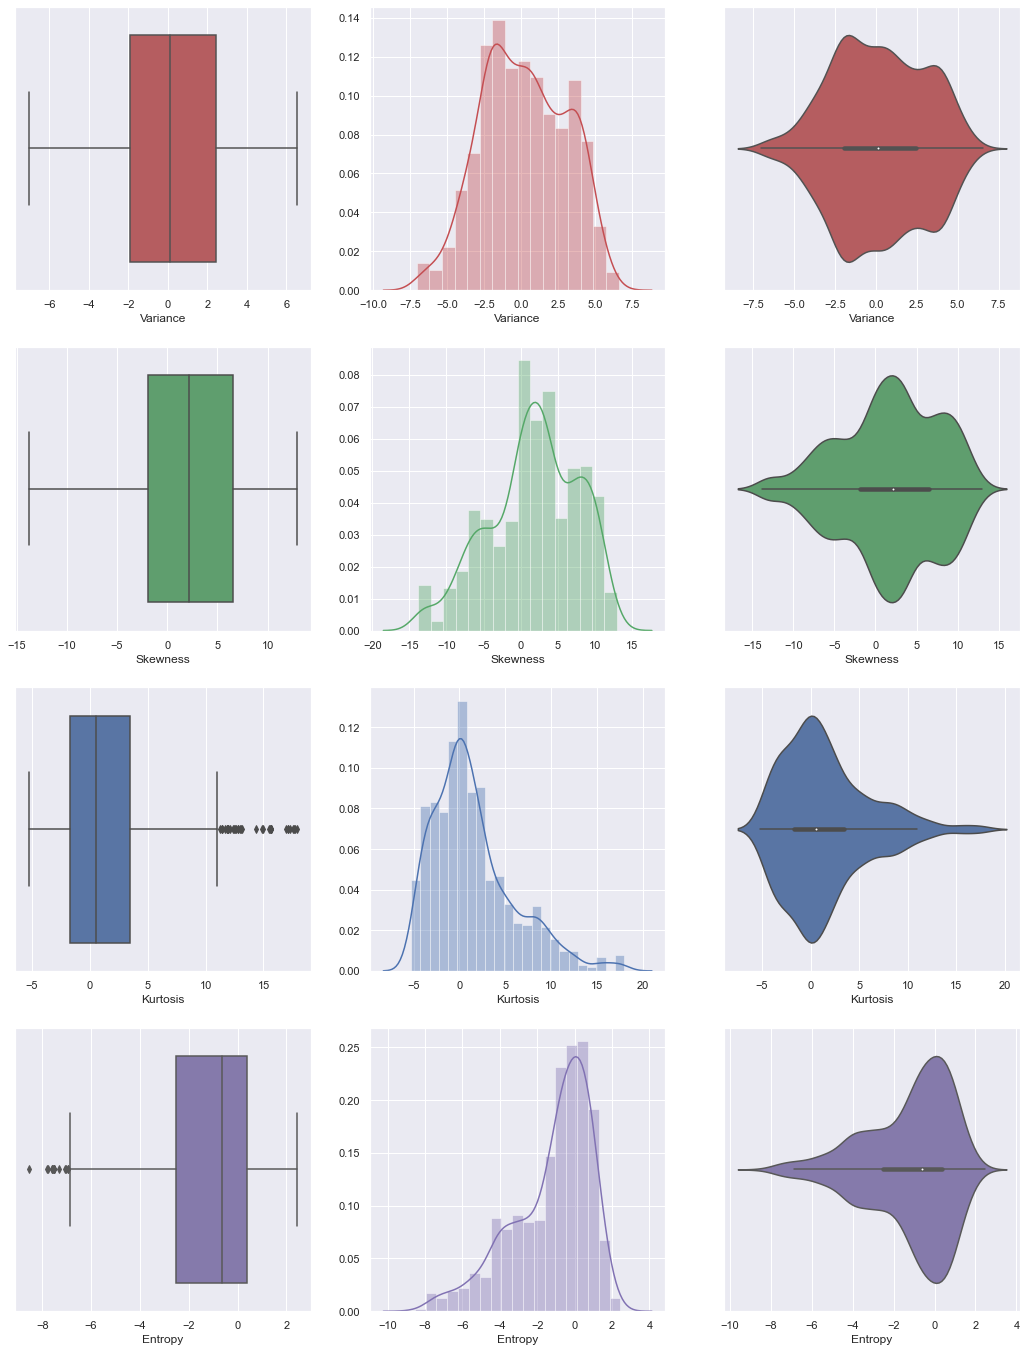

In [111]:
numerical_data=['Variance','Skewness','Kurtosis','Entropy']
quiz_data_numeric = quiz_data[numerical_data]
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in numerical_data:
    sb.boxplot(quiz_data_numeric[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(quiz_data_numeric[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(quiz_data_numeric[var], color = colors[count], ax = axes[count,2])
    count += 1

##### Comment : Which Numerical Variable has the most number of outliers? Ecactly how many outliers does this variable have, if we considered thepoints outside the range [Q1 -1.5 * (Q3-Q1), Q3+1.5* (Q3-Q1) ]

From my observation it seems that kurtosis has the most number of outliers, let's find the exactly how much outliers

In [112]:
quiz_data_numeric = quiz_data[numerical_data]
quiz_data_numeric.skew()

Variance   -0.034753
Skewness   -0.392122
Kurtosis    1.080393
Entropy    -0.969799
dtype: float64

In [113]:
FirstQuantile=quiz_data_numeric.quantile(0.25)
ThirdQuantile=quiz_data_numeric.quantile(0.75)
standard_deviation = ThirdQuantile - FirstQuantile
((quiz_data_numeric < (FirstQuantile - 1.5*standard_deviation)) | (quiz_data_numeric > (ThirdQuantile + 1.5*standard_deviation))).sum()

Variance     0
Skewness     0
Kurtosis    37
Entropy     16
dtype: int64

As we can see the number of the outliers of the ```kurtosis``` is the highest with the number of 37.

###### 1c) Print the statistical description of the response variable banknote

In [114]:
print(quiz_data["Banknote"].value_counts())

Genuine    500
Forged     500
Name: Banknote, dtype: int64


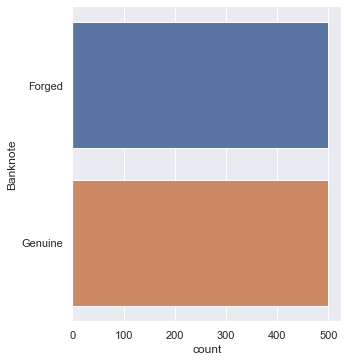

In [115]:
categorical_data=['Banknote']
quiz_data_categorical = pd.DataFrame(quiz_data[categorical_data])
# Draw the distributions of all variables
sb.catplot(y = "Banknote", data = quiz_data_categorical, kind = "count")

In [116]:
Genuine_values = quiz_data_categorical['Banknote'].value_counts().Genuine
Forged_values = quiz_data_categorical['Banknote'].value_counts().Forged
print("Genunine Vaules:", Genuine_values, "Forged Vaules:", Forged_values)
print('Ratio Genuine/Forged :', Genuine_values / Forged_values)

Genunine Vaules: 500 Forged Vaules: 500
Ratio Genuine/Forged : 1.0


##### e) visualize the relationship of the variable bankotes with numerical predictor using swarmplots

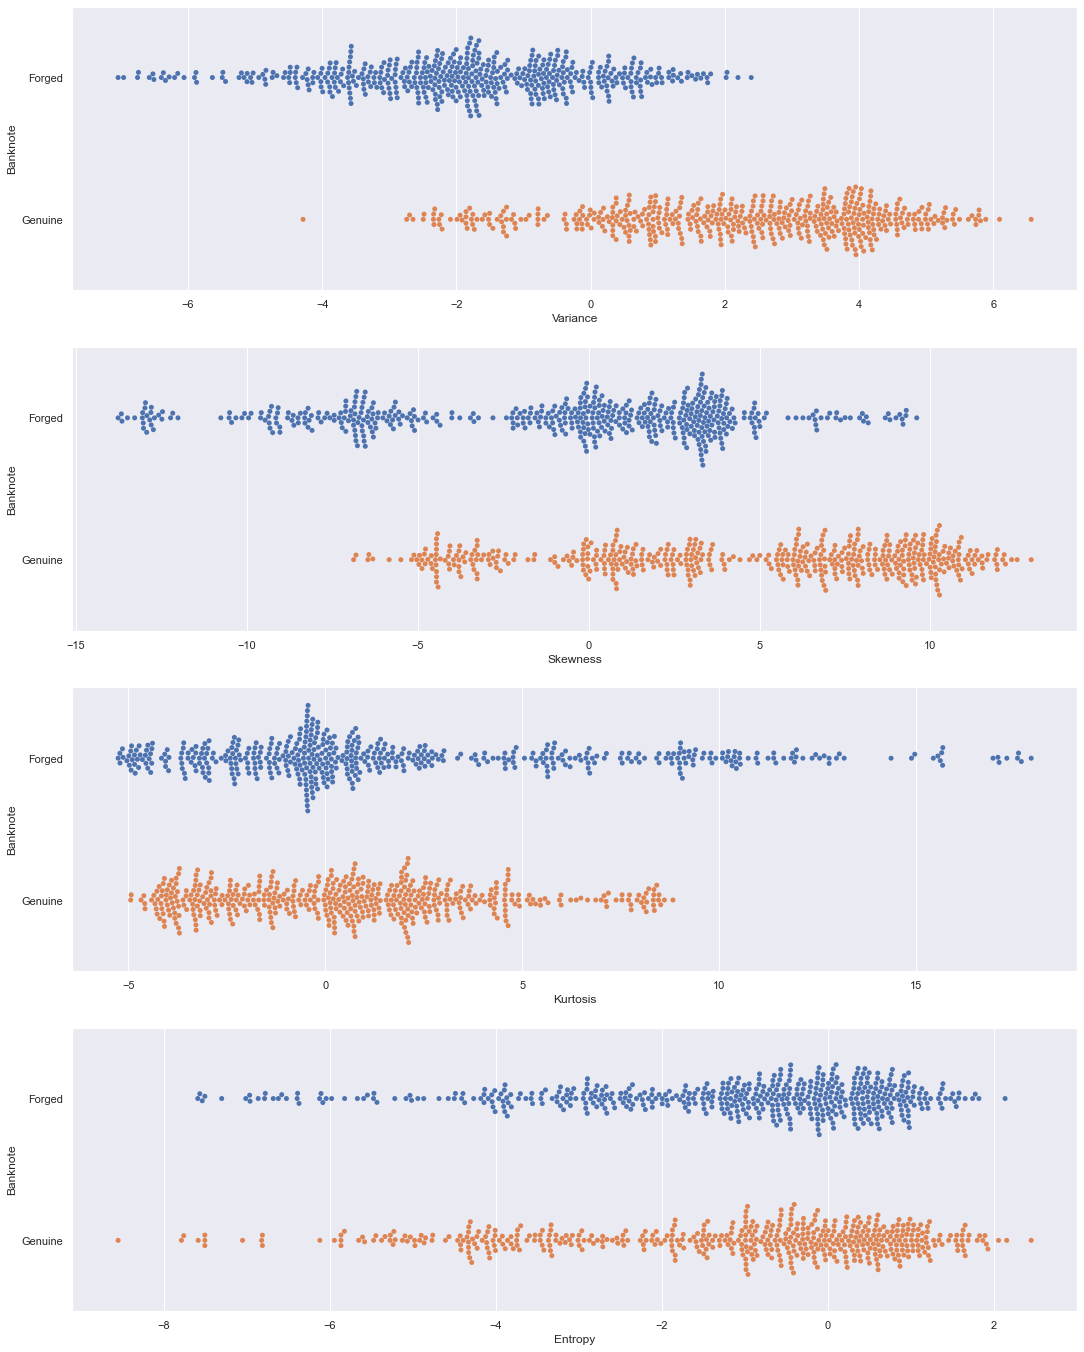

In [117]:
# Relationship between Response and the Predictors
trainDF = pd.concat([quiz_data_numeric, quiz_data_categorical], axis = 1).reindex(quiz_data_categorical.index)

f, axes = plt.subplots(4, 1, figsize=(18, 24))

count = 0
for var in quiz_data_numeric:
    sb.swarmplot(x = var, y = "Banknote", data = trainDF, orient = "h", ax = axes[count])
    count += 1

##### Partition the data randomly into Train and Test sets; 80% Train 20% Test. On the train sets, fit 4 uni-variate decision tree models for banknote against each of the four numeric predictor variables -  Variance, Skewness, Kurotosis, Entropy. Depth max = 4

In [118]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

numerical_data=['Variance','Skewness','Kurtosis','Entropy']
categorical_data=['Banknote']

# Recall the Legendary-Total Dataset
data_quiz_num = pd.DataFrame(quiz_data[numerical_data])         # Predictor
data_quiz_cat = pd.DataFrame(quiz_data[categorical_data])       # Response

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data_quiz_num, data_quiz_cat, test_size = 0.2)


In [122]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz
# Render using graphviz
import graphviz

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
for variable in X_train:
    variable_train = pd.DataFrame(X_train[variable])
    dectree.fit(variable_train, y_train)
    # Export the Decision Tree as a dot object
    treedot = export_graphviz(dectree,                                      # the model
                              feature_names = variable_train.columns,          # the features 
                              out_file = None,                              # output file
                              filled = True,                                # node colors
                              rounded = True,                               # make pretty
                              special_characters = True)                    # postscript
    graphviz.Source(treedot)
    

Classification Accuracy for train Variance w Banknote is 	: 0.85875
Classification Accuracy for test Variance w Banknote is 	: 0.85
Classification Accuracy for train Skewness w Banknote is 	: 0.785
Classification Accuracy for test Skewness w Banknote is 	: 0.8
Classification Accuracy for train Kurtosis w Banknote is 	: 0.655
Classification Accuracy for test Kurtosis w Banknote is 	: 0.61
Classification Accuracy for train Entropy w Banknote is 	: 0.56125
Classification Accuracy for test Entropy w Banknote is 	: 0.47


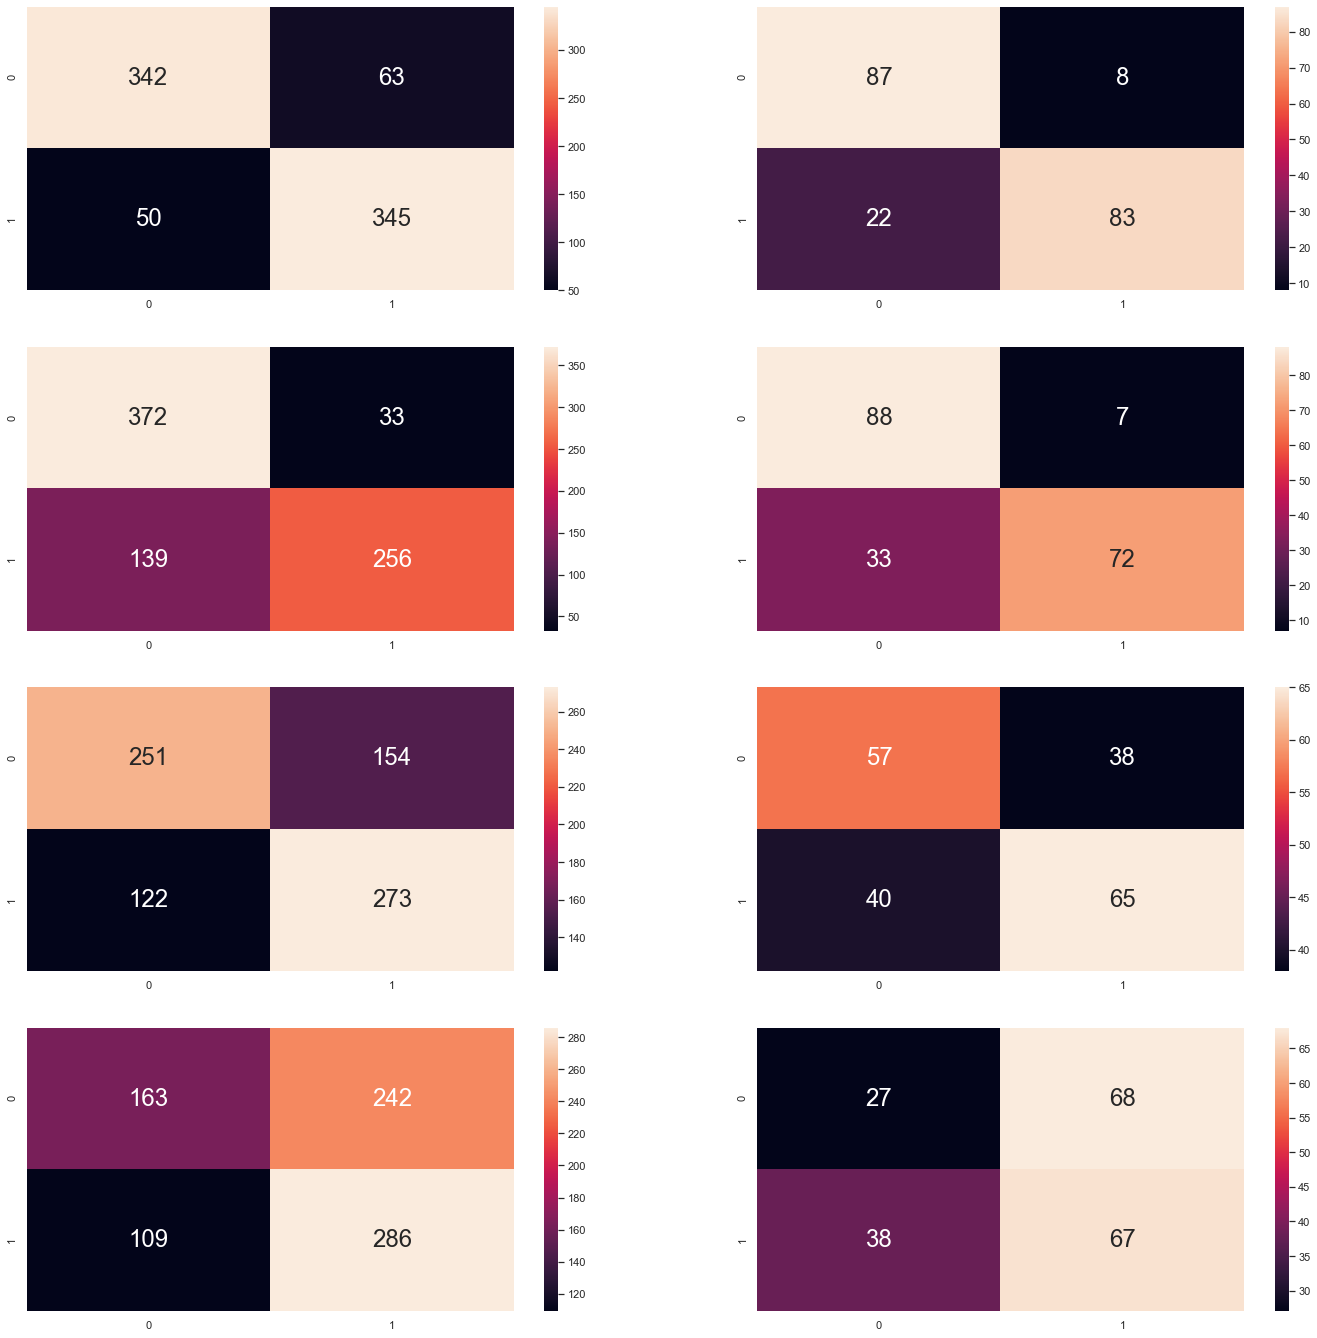

In [138]:
from sklearn.metrics import confusion_matrix
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)
count = 0
f, axes = plt.subplots(4, 2, figsize=(24, 24))
# Train the Decision Tree Classifier model
for variable in X_train:
    variable_train = pd.DataFrame(X_train[variable])
    variable_test = pd.DataFrame(X_test[variable])
    
    #Fitting the model into the training data
    dectree.fit(variable_train, y_train)  
    
    ## Predicting the banknote with the variables called
    banknote_train_predict = dectree.predict(variable_train)
    banknote_test_predict = dectree.predict(variable_test)
    
    # Export the Decision Tree as a dot object
    treedot = export_graphviz(dectree,                                      # the model
                              feature_names = variable_train.columns,          # the features 
                              out_file = None,                              # output file
                              filled = True,                                # node colors
                              rounded = True,                               # make pretty
                              special_characters = True)                    # postscript
    graphviz.Source(treedot)# Train the Decision Tree Classifier model
    
    print("Classification Accuracy for train",variable, "w Banknote is \t:", dectree.score(variable_train, y_train))
    print("Classification Accuracy for test",variable, "w Banknote is \t:", dectree.score(variable_test, y_test))
    
    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y_train, banknote_train_predict),
           annot = True, fmt=".0f", annot_kws={"size": 24}, ax = axes[count,0])
    sb.heatmap(confusion_matrix(y_test, banknote_test_predict), 
           annot = True, fmt=".0f", annot_kws={"size": 24}, ax = axes[count,1])
    count+=1

##### Which variable is the best in predicting the Banknote


Concept: Maybe Variance, it has the highest classificaiton accurary for both the test and also training model.

#### Parttition the data randoly into train and test sets; 80% train and 20% test, On the train set, fit a single mult-variate decision tree model ( max depth 4) for bankronte against all of the numeric predictor variables

'C:\Users\Kai' is not recognized as an internal or external command,
operable program or batch file.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.97125

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.965



CalledProcessError: Command '['dot.bat', '-Tsvg']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\Kai' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]

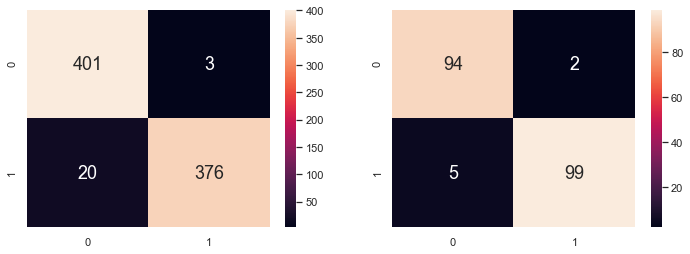

In [140]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

numerical_data=['Variance','Skewness','Kurtosis','Entropy']
categorical_data=['Banknote']

# Recall the Legendary-Total Dataset
data_quiz_num = pd.DataFrame(quiz_data[numerical_data])         # Predictor
data_quiz_cat = pd.DataFrame(quiz_data[categorical_data])       # Response

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data_quiz_num, data_quiz_cat, test_size = 0.2)

### Fitting all of the 4 variables together

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
banknote_train_predict = dectree.predict(X_train)
banknote_test_predict = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, banknote_train_predict),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, banknote_test_predict), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)



##### Code up a small code to ensure that it will reflect the TNP and FNP values

In [149]:
###For Test Values
classification_values = np.ravel(confusion_matrix(y_test, banknote_test_predict))
true_negative = classification_values[0]
false_positive = classification_values[1]
false_negative = classification_values[2]
true_positive = classification_values[3]

print("True Negative Rate for Test \t:", (true_negative) / (true_negative + false_positive))
print("False Negative Rate for Test \t:", (false_negative) / (true_positive + false_negative))


##For Train Values
classification_values_train = np.ravel(confusion_matrix(y_train, banknote_train_predict))
true_negative_train = classification_values_train[0]
false_positive_train = classification_values_train[1]
false_negative_train = classification_values_train[2]
true_positive_train = classification_values_train[3]

print("\n")
print("True Negative Rate for Train \t:", (true_negative_train) / (true_negative_train + false_positive_train))
print("False Negative Rate for Train \t:", (false_negative_train) / (true_positive_train + false_negative_train))

True Negative Rate for Test 	: 0.9791666666666666
False Negative Rate for Test 	: 0.04807692307692308


True Negative Rate for Train 	: 0.9925742574257426
False Negative Rate for Train 	: 0.050505050505050504


###### Predict the variables with the values using the tree model

In [185]:
variables = ['Variance','Skewness','Kurtosis','Entropy']
Variance = [-4.9447, 0.942225, 2.2429, 0.53936, -2.5724]
Skewness = [3.3005,5.58561, -4.1427, 3.8944, -0.95602]
Kurtosis = [1.063, 1.8762, 5.2333, -4.8166, 2.7073]
Entropy = [-1.444, -0.32544, -0.40173, -4.3418, -0.16639]
Variance = pd.Series(Variance)
Skewness = pd.Series(Skewness)
Kurtosis = pd.Series(Kurtosis)
Entropy = pd.Series(Entropy)


data = {'Variance': Variance, 
        'Skewness': Skewness, 
        'Kurtosis': Kurtosis,
       'Entropty' : Entropy
       } 

predicting_data = pd.DataFrame(data)
predicting_data.head()

,Variance,Skewness,Kurtosis,Entropty
0,-4.944700,3.30050,1.0630,-1.44400
1,0.942225,5.58561,1.8762,-0.32544
2,2.242900,-4.14270,5.2333,-0.40173
3,0.539360,3.89440,-4.8166,-4.34180
4,-2.572400,-0.95602,2.7073,-0.16639


In [187]:
banknote_new_predict = dectree.predict(predicting_data)
predicting_data['Predictions'] = banknote_new_predict
predicting_data.head()

,Variance,Skewness,Kurtosis,Entropty,Predictions
0,-4.944700,3.30050,1.0630,-1.44400,Forged
1,0.942225,5.58561,1.8762,-0.32544,Genuine
2,2.242900,-4.14270,5.2333,-0.40173,Genuine
3,0.539360,3.89440,-4.8166,-4.34180,Forged
4,-2.572400,-0.95602,2.7073,-0.16639,Forged
